#### **Import Libs**

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier

#### **Getting training && validation data**

In [2]:
df_train = pd.read_csv('../databases/training.csv')
df_test = pd.read_csv('../databases/test.csv')

In [3]:
X_train, y_train = df_train.drop(['IND_BOM_1_1'], axis=1), df_train['IND_BOM_1_1']
X_test, y_test = df_test.drop(['IND_BOM_1_1'], axis=1), df_test['IND_BOM_1_1']

In [4]:
X_train = np.array(X_train)
X_test = np.array(X_test)

#### **Training model**

Best parameters found on optuna study:
```python

params = {
    'max_depth': 5,
    'min_samples_split': 19,
    'min_samples_leaf': 10,
    'criterion': 'gini',
    'splitter': 'best'
}

```

In [5]:
model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=19,
    criterion='gini',
    splitter='best'
)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=19)

In [6]:
import joblib

joblib.dump(model, './raw_models/decision_tree.pkl')

['./raw_models/decision_tree.pkl']

#### **Model evaluation**

In [7]:
from sklearn.metrics import accuracy_score, log_loss, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import scikitplot as skplt

In [8]:
y_pred = model.predict(X_test)
y_probas = model.predict_proba(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_probas)

print(f'Loss: {loss}\nAccuracy: {accuracy}')

Loss: 0.6505690052643475
Accuracy: 0.5974228208821583


##### KS and AUC analysis

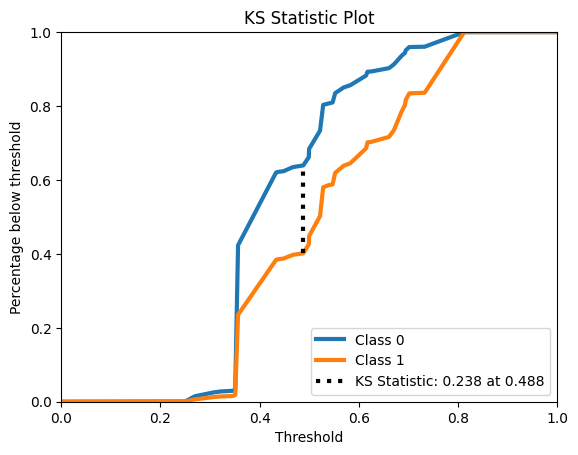

In [10]:
skplt.metrics.plot_ks_statistic(y_true=y_test, y_probas=y_probas)
plt.show()